# Spectral Loss for Fundamental Mode of N3 as outer ring moves closer

Here we compare the spectral loss for the N3 configuration to that of N3 as we decrease the buffer air region of N3. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


First we load and visualize the spectral loss for N1

# Initialize

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
outer = 'h2'
nu = 1

N2betas = np.load('data/N2_base.npy')

In [13]:
N2betas = np.load('data/N2_base.npy')
N3betas = np.load('data/N3base.npy')
N1betas = np.load('../N2_varying_thickness_studies/data/N1_wls.npy')

In [8]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass, lambda x: n_air]
mats = ['air', 'glass','air', 'glass', 'air']
maxhs = [100 for r in mats]

d = 4.0775e-05
ts = [d , 1e-5, d, 1e-5, 2e-5]
A = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=maxhs)

In [9]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

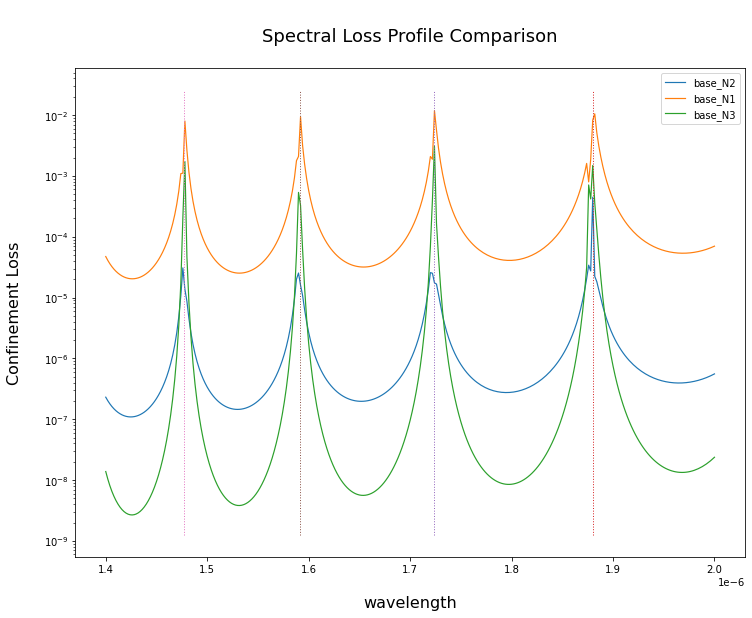

In [14]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N2betas.imag, linewidth=1.2, label='base_N2')
ax.plot(wls, -N1betas.imag, linewidth=1.2, label='base_N1')
ax.plot(wls, -N3betas.imag, linewidth=1.2, label='base_N3')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Make air region smaller

This is without filtering out the higher mode though, which I need to do, but this gets it start being set up.

In [16]:
betas1 = np.zeros_like(wls, dtype=complex)

t1 = .75
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]


for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(N3betas[i])
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33280050409826-6.511834365130334e-09j) . Residual of determinant:  5.252079950630947e-07 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23671826977095-4.931746803220306e-09j) . Residual of determinant:  1.0739009973575947e-07 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.1409113871355-3.87196379321937e-09j) . Residual of determinant:  9.241992047233791e-08 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04537829884926-3.137495819234531e-09j) . Residual of determinant:  9.431034478215411e-07 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95011755861111-2.614965357713554e-09j) . Residual of determinant:  1.8255054887449135e-07 


     --------------

Scaled beta:  (63.60721797652711-3.5295400858274456e-06j) . Residual of determinant:  8.54172073226938e-10 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Scaled beta:  (63.5212549915979-9.54788696535591e-07j) . Residual of determinant:  5.557703881286302e-10 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

Scaled beta:  (63.43562366889905-3.590106467766354e-07j) . Residual of determinant:  1.1878791624862868e-09 


     --------------------  45/301: wavelength: 1.488e-06  --------------------     

Scaled beta:  (63.35026699937656-1.6566635549343424e-07j) . Residual of determinant:  3.037539326515312e-08 


     --------------------  46/301: wavelength: 1.49e-06  --------------------     

Scaled beta:  (63.265162969164145-8.78687506361699e-08j) . Residual of determinant:  1.2044541385564692e-08 


     --------------------  47/301: wavelength: 1.4919999999999999e-06  --------------------     


Scaled beta:  (60.2708018447927-1.2120880503870318e-08j) . Residual of determinant:  1.4367367687453856e-08 


     --------------------  84/301: wavelength: 1.566e-06  --------------------     

Scaled beta:  (60.19379454538922-1.590354486414593e-08j) . Residual of determinant:  1.763439646660241e-07 


     --------------------  85/301: wavelength: 1.5679999999999999e-06  --------------------     

Scaled beta:  (60.116981193362875-2.1502909452356458e-08j) . Residual of determinant:  3.695415255098784e-08 


     --------------------  86/301: wavelength: 1.57e-06  --------------------     

Scaled beta:  (60.04036032853191-3.0098646567075624e-08j) . Residual of determinant:  6.807905959837396e-08 


     --------------------  87/301: wavelength: 1.572e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (59.96393019634707-4.387921487642694e-08j) . Residual of determinant:  5.5437452585943236e-09 


     --------------------  88/301: wavelength: 1.5739999999

Scaled beta:  (57.33743382554717-3.04940811324765e-09j) . Residual of determinant:  7.724336641318031e-07 


     --------------------  124/301: wavelength: 1.646e-06  --------------------     

Scaled beta:  (57.26774195474834-2.9362991268744053e-09j) . Residual of determinant:  3.0282373357969225e-07 


     --------------------  125/301: wavelength: 1.648e-06  --------------------     

Scaled beta:  (57.19821931662293-2.854848062563057e-09j) . Residual of determinant:  5.960541471452628e-07 


     --------------------  126/301: wavelength: 1.6499999999999999e-06  --------------------     

Scaled beta:  (57.128865263534145-2.8019687152826664e-09j) . Residual of determinant:  4.977541021770024e-07 


     --------------------  127/301: wavelength: 1.652e-06  --------------------     

Scaled beta:  (57.05967915281891-2.7756314111241067e-09j) . Residual of determinant:  5.328823750358092e-07 


     --------------------  128/301: wavelength: 1.654e-06  --------------------     

Sca

scaling guess: 1
scaling guess: 2
Scaled beta:  (54.67795390905927-0.004358615323221026j) . Residual of determinant:  3.3365894462479256e-14 


     --------------------  164/301: wavelength: 1.7259999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.615070141153936-0.00011395193144209406j) . Residual of determinant:  2.0661212665488463e-11 


     --------------------  165/301: wavelength: 1.7279999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.55089788383994-2.2715118530225652e-05j) . Residual of determinant:  5.207500199784009e-11 


     --------------------  166/301: wavelength: 1.73e-06  --------------------     

Scaled beta:  (54.48739944306956-6.624949208845545e-06j) . Residual of determinant:  2.3534891632595587e-11 


     --------------------  167/301: wavelength: 1.7319999999999999e-06  --------------------     

Scaled beta:  (54.424235054171376-2.5406571832288936e-06j) . Residual of determinant:  1.0155635752225886

Scaled beta:  (52.13511183017318-4.675245634941661e-09j) . Residual of determinant:  6.037694671891195e-08 


     --------------------  206/301: wavelength: 1.8099999999999998e-06  --------------------     

Scaled beta:  (52.07748073783517-4.867493037185844e-09j) . Residual of determinant:  1.5169727837974214e-07 


     --------------------  207/301: wavelength: 1.8119999999999998e-06  --------------------     

Scaled beta:  (52.01997669485907-5.100997276906025e-09j) . Residual of determinant:  1.4383491674539513e-08 


     --------------------  208/301: wavelength: 1.814e-06  --------------------     

Scaled beta:  (51.962599255412094-5.381390635869115e-09j) . Residual of determinant:  1.4143757942478239e-08 


     --------------------  209/301: wavelength: 1.8159999999999999e-06  --------------------     

Scaled beta:  (51.905347973539094-5.715774122786766e-09j) . Residual of determinant:  3.585547869422873e-07 


     --------------------  210/301: wavelength: 1.817999999999

scaling guess: 1
Scaled beta:  (49.979872570825556-2.4600827298490135e-05j) . Residual of determinant:  1.5090431597407722e-10 


     --------------------  245/301: wavelength: 1.888e-06  --------------------     

Scaled beta:  (49.92653794509953-9.302920263706493e-06j) . Residual of determinant:  8.25382263150012e-11 


     --------------------  246/301: wavelength: 1.89e-06  --------------------     

Scaled beta:  (49.87345941948659-4.19766139305618e-06j) . Residual of determinant:  8.766781777654698e-11 


     --------------------  247/301: wavelength: 1.8919999999999998e-06  --------------------     

Scaled beta:  (49.82056758637451-2.1576158278323808e-06j) . Residual of determinant:  1.350957607319933e-10 


     --------------------  248/301: wavelength: 1.894e-06  --------------------     

Scaled beta:  (49.76783065772714-1.2226336698586479e-06j) . Residual of determinant:  2.7114683195901203e-10 


     --------------------  249/301: wavelength: 1.8959999999999997e-06  -

scaling guess: 1
Scaled beta:  (47.895244445739834-6.6178457500336494e-09j) . Residual of determinant:  1.3072052271969553e-07 


     --------------------  286/301: wavelength: 1.9699999999999998e-06  --------------------     

Scaled beta:  (47.846597007437175-6.6462066623025614e-09j) . Residual of determinant:  4.600615954782236e-07 


     --------------------  287/301: wavelength: 1.972e-06  --------------------     

Scaled beta:  (47.79804820028232-6.704610686365481e-09j) . Residual of determinant:  1.2901815441296496e-07 


     --------------------  288/301: wavelength: 1.974e-06  --------------------     

Scaled beta:  (47.74959771040082-6.793718352743914e-09j) . Residual of determinant:  4.3326844591298763e-07 


     --------------------  289/301: wavelength: 1.976e-06  --------------------     

Scaled beta:  (47.70124522503647-6.91467602029618e-09j) . Residual of determinant:  1.0755919754057516e-07 


     --------------------  290/301: wavelength: 1.978e-06  ----------

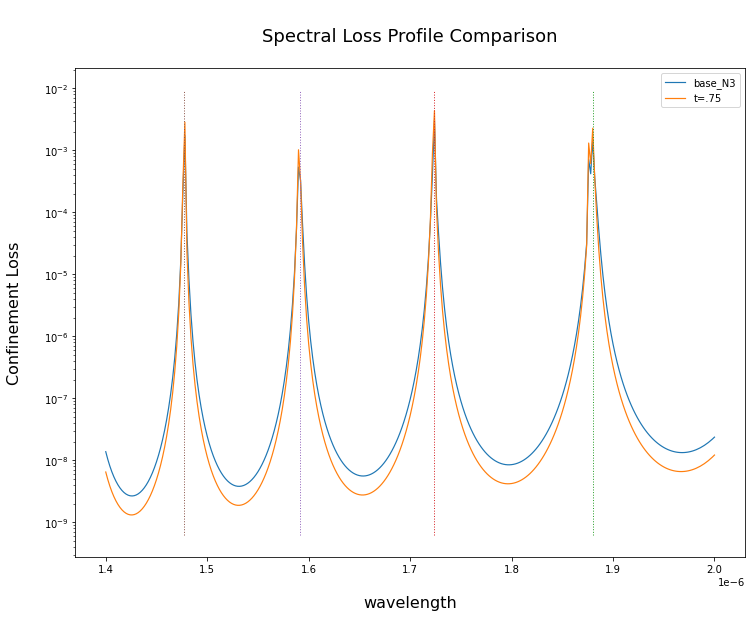

In [18]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N3betas.imag, linewidth=1.2, label='base_N3')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')



# More air


In [22]:
betas2 = np.zeros_like(wls, dtype=complex)

t1 = .25
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas1
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i])
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33279306360691-1.694129842113012e-08j) . Residual of determinant:  3.5642644120723956e-08 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23671172837804-1.3075478203695563e-08j) . Residual of determinant:  7.289060411473524e-08 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14090553811994-1.0439030019915157e-08j) . Residual of determinant:  7.001806438208993e-07 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.0453729901496-8.587194802211367e-09j) . Residual of determinant:  7.662047051588239e-07 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.9501126752418-7.255993937511293e-09j) . Residual of determinant:  5.217830480087924e-08 


     -------------

scaling guess: 13
scaling guess: 14
Scaled beta:  (63.862234451140814-0.0016815506261925054j) . Residual of determinant:  1.2499915636117733e-13 


     --------------------  40/301: wavelength: 1.4779999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
Scaled beta:  (63.76991707409863-0.00461625493851533j) . Residual of determinant:  8.507990111161751e-15 


     --------------------

Scaled beta:  (60.7369756958946-1.2935258036218802e-08j) . Residual of determinant:  7.51726592022448e-09 


     --------------------  78/301: wavelength: 1.5539999999999999e-06  --------------------     

Scaled beta:  (60.65878081876986-1.5180479451383386e-08j) . Residual of determinant:  5.262146897042765e-08 


     --------------------  79/301: wavelength: 1.556e-06  --------------------     

Scaled beta:  (60.58078608820037-1.8136195541093094e-08j) . Residual of determinant:  8.38934714340467e-09 


     --------------------  80/301: wavelength: 1.558e-06  --------------------     

Scaled beta:  (60.50299055630236-2.2090657502597407e-08j) . Residual of determinant:  1.62963392352037e-07 


     --------------------  81/301: wavelength: 1.5599999999999999e-06  --------------------     

Scaled beta:  (60.42539323274063-2.748347337945195e-08j) . Residual of determinant:  2.9843136436885014e-09 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  ------------

Scaled beta:  (57.830063814983426-1.472277068020156e-08j) . Residual of determinant:  1.5900409477827577e-07 


     --------------------  117/301: wavelength: 1.6319999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.75916894908754-1.323666578861904e-08j) . Residual of determinant:  1.1267284941266836e-07 


     --------------------  118/301: wavelength: 1.634e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.68844801123954-1.2052083823883932e-08j) . Residual of determinant:  5.0149099105942505e-09 


     --------------------  119/301: wavelength: 1.6359999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.61790029612179-1.1105502497501392e-08j) . Residual of determinant:  1.2161290613771728e-07 


     --------------------  120/301: wavelength: 1.6379999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.547525111520635-1.035023601660319e-08j) . Residual of determinant:  1.95881839855284

Scaled beta:  (55.12327397455486-2.9087213190921218e-06j) . Residual of determinant:  1.960478341931386e-10 


     --------------------  157/301: wavelength: 1.7119999999999999e-06  --------------------     

Scaled beta:  (55.05872015063533-6.553598290116251e-06j) . Residual of determinant:  4.701509552303167e-10 


     --------------------  158/301: wavelength: 1.714e-06  --------------------     

Scaled beta:  (54.99422629351153-1.8440163012538733e-05j) . Residual of determinant:  3.141212684940312e-11 


     --------------------  159/301: wavelength: 1.716e-06  --------------------     

Scaled beta:  (54.92965272516383-7.626061289396443e-05j) . Residual of determinant:  3.2583518720709634e-11 


     --------------------  160/301: wavelength: 1.718e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.86440484193208-0.000635442962055049j) . Residual of determinant:  4.0821437703599626e-13 


     --------------------  161/301: wavelength: 1.7199999999999998e-06  -

scaling guess: 1
Scaled beta:  (52.777560037630806-1.3438142861290398e-08j) . Residual of determinant:  2.526798610131182e-07 


     --------------------  195/301: wavelength: 1.7879999999999999e-06  --------------------     

Scaled beta:  (52.718501760603985-1.3118973528721408e-08j) . Residual of determinant:  3.125567793062164e-08 


     --------------------  196/301: wavelength: 1.7899999999999998e-06  --------------------     

Scaled beta:  (52.659575496829376-1.2895692486570148e-08j) . Residual of determinant:  5.0862868321101324e-08 


     --------------------  197/301: wavelength: 1.792e-06  --------------------     

Scaled beta:  (52.600780781845565-1.2762048656055591e-08j) . Residual of determinant:  4.724618649837533e-08 


     --------------------  198/301: wavelength: 1.7939999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.542117154134054-1.2714063400032923e-08j) . Residual of determinant:  2.2196211148136672e-07 


     ----------------

Scaled beta:  (50.567706839153466-4.742809383771139e-06j) . Residual of determinant:  1.017749627290354e-10 


     --------------------  234/301: wavelength: 1.8659999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (50.51334862142794-9.417275092629104e-06j) . Residual of determinant:  6.445272684073993e-11 


     --------------------  235/301: wavelength: 1.868e-06  --------------------     

Scaled beta:  (50.45903388056041-2.1765364493990128e-05j) . Residual of determinant:  1.2568205414662338e-10 


     --------------------  236/301: wavelength: 1.8699999999999999e-06  --------------------     

Scaled beta:  (50.40468231981501-6.365688136001206e-05j) . Residual of determinant:  4.481217142403788e-11 


     --------------------  237/301: wavelength: 1.8719999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (50.3500471652536-0.0002740828899914725j) . Residual of determinant:  3.7160476511871874e-13

Scaled beta:  (48.58683319805139-2.8426109093771968e-08j) . Residual of determinant:  1.1982800307366467e-08 


     --------------------  272/301: wavelength: 1.9419999999999998e-06  --------------------     

Scaled beta:  (48.536771300448315-2.6807913142752755e-08j) . Residual of determinant:  8.119546009766434e-08 


     --------------------  273/301: wavelength: 1.944e-06  --------------------     

Scaled beta:  (48.486812596034845-2.5429653514293294e-08j) . Residual of determinant:  1.9521535350023532e-07 


     --------------------  274/301: wavelength: 1.9459999999999997e-06  --------------------     

Scaled beta:  (48.436956739774885-2.4258474249173856e-08j) . Residual of determinant:  5.631334601921237e-08 


     --------------------  275/301: wavelength: 1.948e-06  --------------------     

Scaled beta:  (48.38720339051328-2.3267800030831463e-08j) . Residual of determinant:  1.6577834796707237e-07 


     --------------------  276/301: wavelength: 1.95e-06  -----------

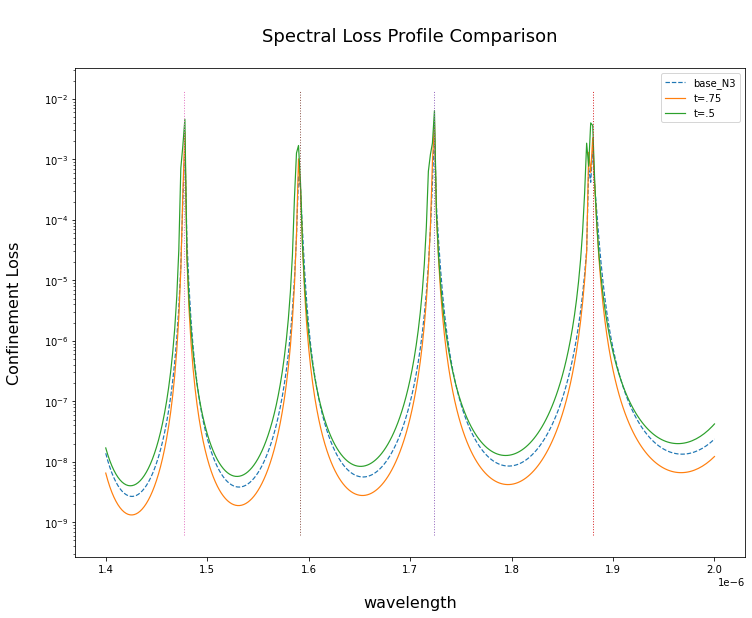

In [24]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N3betas.imag, linewidth=1.2, linestyle='--', label='base_N3')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=.5')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Even more

In [25]:
betas3 = np.zeros_like(wls, dtype=complex)

t1 = .1
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas2
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i])
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas3[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.3327836229016-7.376842988836228e-08j) . Residual of determinant:  4.404894229046715e-08 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23670324009333-5.854179605167315e-08j) . Residual of determinant:  1.2406286530253955e-07 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14089779425957-4.792787760966756e-08j) . Residual of determinant:  3.2735582927939756e-08 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04536583219873-4.0344282927286154e-08j) . Residual of determinant:  8.665410982238248e-08 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95010597923486-3.4826113835585797e-08j) . Residual of determinant:  1.463570091942585e-07 



scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
Scaled beta:  (63.92936358424522-0.002787979278071475j) . Residual of determinant:  1.4017062365471855e-15 


     --------------------  39/301: wavelength: 1.476e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (63.864588588301345-0.0005117868874627179j) . Residual of determinant:  5.93270672985091e-13 


     --------------------  40/301: wavelength: 1.4779999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 

Scaled beta:  (60.89395921173953-6.46296889797472e-08j) . Residual of determinant:  4.09345570981554e-09 


     --------------------  76/301: wavelength: 1.55e-06  --------------------     

Scaled beta:  (60.81536043276007-7.52203170972876e-08j) . Residual of determinant:  3.2604173441962076e-08 


     --------------------  77/301: wavelength: 1.552e-06  --------------------     

Scaled beta:  (60.73696342715006-8.911023018442493e-08j) . Residual of determinant:  2.7455771164415343e-09 


     --------------------  78/301: wavelength: 1.5539999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.658767249903654-1.0760856227394707e-07j) . Residual of determinant:  1.0834175290017724e-08 


     --------------------  79/301: wavelength: 1.556e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.58077091606128-1.327029706053041e-07j) . Residual of determinant:  1.0123008035797846e-08 


     --------------------  80/301: wavelength: 1.558e-06  ---

scaling guess: 1
Scaled beta:  (58.18715956115184-1.3339311245547785e-07j) . Residual of determinant:  3.43466799779293e-08 


     --------------------  112/301: wavelength: 1.6219999999999999e-06  --------------------     

Scaled beta:  (58.11538472093295-1.1334218411195436e-07j) . Residual of determinant:  1.4546057621199312e-08 


     --------------------  113/301: wavelength: 1.6239999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (58.04378750987385-9.795915366425827e-08j) . Residual of determinant:  9.875181281632573e-09 


     --------------------  114/301: wavelength: 1.626e-06  --------------------     

Scaled beta:  (57.972367119271446-8.599865692020378e-08j) . Residual of determinant:  2.9620749094390126e-08 


     --------------------  115/301: wavelength: 1.628e-06  --------------------     

Scaled beta:  (57.901122774496855-7.660013801561789e-08j) . Residual of determinant:  1.4537457340611845e-08 


     ------------------

Scaled beta:  (55.38259241718278-5.117917516397252e-06j) . Residual of determinant:  8.437526250262741e-11 


     --------------------  153/301: wavelength: 1.704e-06  --------------------     

scaling guess: 1
Scaled beta:  (55.31748571676329-9.71302934703097e-06j) . Residual of determinant:  1.3782152286516506e-10 


     --------------------  154/301: wavelength: 1.7059999999999998e-06  --------------------     

Scaled beta:  (55.25248406261818-2.1570188557120132e-05j) . Residual of determinant:  3.139552194287464e-11 


     --------------------  155/301: wavelength: 1.708e-06  --------------------     

Scaled beta:  (55.18752394868249-6.256968598273038e-05j) . Residual of determinant:  5.543066800392185e-11 


     --------------------  156/301: wavelength: 1.71e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (55.12235634829967-0.0003116284797285754j) . Residual of determinant: 

Scaled beta:  (53.55753496845274-1.6483382098783617e-07j) . Residual of determinant:  5.160987708787032e-09 


     --------------------  182/301: wavelength: 1.7619999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (53.496716730233366-1.4585629280361426e-07j) . Residual of determinant:  1.0043482189084898e-08 


     --------------------  183/301: wavelength: 1.764e-06  --------------------     

scaling guess: 1
Scaled beta:  (53.436036987872704-1.305356408513062e-07j) . Residual of determinant:  1.3132147513112352e-08 


     --------------------  184/301: wavelength: 1.766e-06  --------------------     

scaling guess: 1
Scaled beta:  (53.37549517969336-1.1807065553538985e-07j) . Residual of determinant:  1.4398715918460189e-08 


     --------------------  185/301: wavelength: 1.7679999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (53.315090761229996-1.0786779682264001e-07j) . Residual of determinant:  3.99894974

Scaled beta:  (51.28372715053357-6.047037474444263e-07j) . Residual of determinant:  3.596403026526661e-09 


     --------------------  221/301: wavelength: 1.8399999999999997e-06  --------------------     

Scaled beta:  (51.22794762650218-7.58299755054288e-07j) . Residual of determinant:  3.440176520804243e-09 


     --------------------  222/301: wavelength: 1.842e-06  --------------------     

Scaled beta:  (51.17228664598541-9.700686365650612e-07j) . Residual of determinant:  4.135899707943708e-09 


     --------------------  223/301: wavelength: 1.8439999999999998e-06  --------------------     

Scaled beta:  (51.1167431782982-1.2695593006059162e-06j) . Residual of determinant:  1.0176690423464295e-09 


     --------------------  224/301: wavelength: 1.8459999999999998e-06  --------------------     

Scaled beta:  (51.061315953357145-1.7059280958723959e-06j) . Residual of determinant:  3.4365340237126397e-09 


     --------------------  225/301: wavelength: 1.848e-06  -----

Scaled beta:  (49.247171157572794-4.582729303056081e-07j) . Residual of determinant:  2.2258817349181182e-10 


     --------------------  259/301: wavelength: 1.916e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (49.1957346213456-3.9534349302592044e-07j) . Residual of determinant:  3.333286785027694e-09 


     --------------------  260/301: wavelength: 1.918e-06  --------------------     

Scaled beta:  (49.14440638418701-3.44890385682094e-07j) . Residual of determinant:  8.805044348524954e-09 


     --------------------  261/301: wavelength: 1.92e-06  --------------------     

Scaled beta:  (49.0931859537196-3.0399769300588007e-07j) . Residual of determinant:  6.743061560387916e-09 


     --------------------  262/301: wavelength: 1.922e-06  --------------------     

Scaled beta:  (49.042072866976994-2.705334681148664e-07j) . Residual of determinant:  5.8189087249570355e-09 


     --------------------  263/301: wavelength: 1.9239999999999997e-06

scaling guess: 1
Scaled beta:  (47.27039735555053-2.2542520412502725e-07j) . Residual of determinant:  5.165248540720763e-09 


     --------------------  299/301: wavelength: 1.996e-06  --------------------     

Scaled beta:  (47.223006262082784-2.469508798789838e-07j) . Residual of determinant:  7.879676946099918e-09 


     --------------------  300/301: wavelength: 1.9979999999999998e-06  --------------------     

Scaled beta:  (47.175709571316446-2.7225025892388944e-07j) . Residual of determinant:  8.365655568879015e-09 


     --------------------  301/301: wavelength: 2e-06  --------------------     

Scaled beta:  (47.1285069440561-3.021358549720428e-07j) . Residual of determinant:  3.05567035767737e-09 




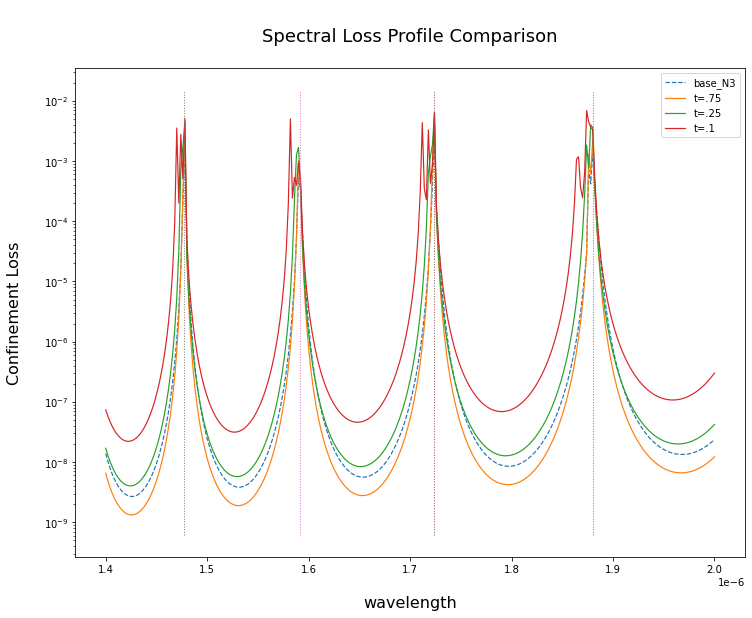

In [26]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N3betas.imag, linewidth=1.2, linestyle='--', label='base_N3')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=.25')
ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=.1')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')



# Closer

In [27]:
betas4 = np.zeros_like(wls, dtype=complex)

t1 = .01
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas3
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i])
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas4[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33273723814847-9.791367059010272e-07j) . Residual of determinant:  3.0055747661968712e-09 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.23665824497584-8.855007829308659e-07j) . Residual of determinant:  5.939318043681858e-10 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14085363532931-8.236795734041854e-07j) . Residual of determinant:  2.0262659243193853e-09 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04532200410218-7.866205282777246e-07j) . Residual of determinant:  3.2993206001741037e-09 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95006199799901-7.703707733715237e-07j) . Residual of determinant:  7.324110848162091e-10 



scaling guess: 1
Scaled beta:  (63.86400847080322-0.00033208529200559497j) . Residual of determinant:  3.0592457285886906e-12 


     --------------------  40/301: wavelength: 1.4779999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
Scaled beta:  (63.76681690904534-0.005730212381573438j) . Residual of determinant:  1.0249630820085586e-15 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:

scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
Scaled beta:  (60.89469486628751-0.00020358547674096433j) . Residual of determinant:  3.200138493079832e-11 


     --------------------  76/301: wavelength: 1.55e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.81569770895291-5.3767021840332144e-05j) . Residual of determinant:  6.125172558529751e-11 


     --------------------  77/301: wavelength: 1.552e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.73714858186838-2.7254769586226164e-05j) . Residual of determinant:  7.41709606074024e-11 


     --------------------  78/301: wavelength: 1.5539999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (60.65883699949347-2.2239254783504937e-05j) . Residual of determinant:  5.274166868455397e-11 


     --------------------  79/301: wavelength: 1.556e-06  --------------------     

Scaled beta:  (60.580642727209245-4.478316423197082e

Scaled beta:  (57.97230623423138-1.3785170203243938e-06j) . Residual of determinant:  1.5888654974582613e-09 


     --------------------  115/301: wavelength: 1.628e-06  --------------------     

Scaled beta:  (57.901061687086276-1.3526732205219275e-06j) . Residual of determinant:  2.3751163986540914e-10 


     --------------------  116/301: wavelength: 1.6299999999999999e-06  --------------------     

Scaled beta:  (57.82999205560835-1.3463453072570472e-06j) . Residual of determinant:  1.4890185053993166e-09 


     --------------------  117/301: wavelength: 1.6319999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.75909659951181-1.359030656321449e-06j) . Residual of determinant:  1.4702421239045682e-09 


     --------------------  118/301: wavelength: 1.634e-06  --------------------     

Scaled beta:  (57.688374583787876-1.3912614819994377e-06j) . Residual of determinant:  2.1064740341972394e-09 


     --------------------  119/301: wavelength: 1.63

scaling guess: 1
Scaled beta:  (55.644701997976775-1.1114854430163136e-05j) . Residual of determinant:  6.294147349251318e-11 


     --------------------  149/301: wavelength: 1.696e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (55.579036099284856-1.0141585003079863e-05j) . Residual of determinant:  1.8548855808828305e-10 


     --------------------  150/301: wavelength: 1.6979999999999999e-06  --------------------     

Scaled beta:  (55.51352833044212-9.698951499898536e-06j) . Residual of determinant:  5.888726877418786e-11 


     --------------------  151/301: wavelength: 1.6999999999999998e-06  --------------------     

Scaled beta:  (55.44817625959177-9.648476231252218e-06j) . Residual of determinant:  1.765319975641034e-11 


     --------------------  152/301: wavelength: 1.702e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (55.38297798057349-9.94802855956178

Scaled beta:  (53.25474860968201-1.8377078642323932e-06j) . Residual of determinant:  7.081972853036414e-10 


     --------------------  187/301: wavelength: 1.772e-06  --------------------     

Scaled beta:  (53.1946161112047-1.8633155321452135e-06j) . Residual of determinant:  1.5861655253627743e-09 


     --------------------  188/301: wavelength: 1.7739999999999999e-06  --------------------     

Scaled beta:  (53.13461906341126-1.9089282430705414e-06j) . Residual of determinant:  7.082358559166339e-10 


     --------------------  189/301: wavelength: 1.7759999999999998e-06  --------------------     

Scaled beta:  (53.07475693253922-1.97625786070233e-06j) . Residual of determinant:  1.6627838060818805e-10 


     --------------------  190/301: wavelength: 1.778e-06  --------------------     

Scaled beta:  (53.01502918121673-2.067989906349695e-06j) . Residual of determinant:  6.930113877402475e-10 


     --------------------  191/301: wavelength: 1.78e-06  -------------------

scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
scaling guess: 37
scaling guess: 38
scaling guess: 39
Scaled beta:  (51.50648843708232-0.0012884021868642581j) . Residual of determinant:  2.79331602010221e-12 


     --------------------  217/301: wavelength: 1.832e-06  --------------------     

Scaled beta:  (51.45281780826924-0.00018979504297141756j) . Residual of determinant:  4.720743498656407e-13 


     --------------------  218/301: wavelength: 1.834e-06  --------------------     

Scaled beta:  (51.39626812966244-5.6163678378313875e-05j) . Residual of determinant:  2.9808604197569744e-11 


     --------------------  219/301: wavelength: 1.8359999999999999e-06  --------------------     

Scaled beta:  (51.3

Scaled beta:  (49.5058895980621-6.2301411637503494e-06j) . Residual of determinant:  3.355167760510903e-10 


     --------------------  254/301: wavelength: 1.9059999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (49.45390654567427-5.431290020171632e-06j) . Residual of determinant:  1.1931611083990317e-10 


     --------------------  255/301: wavelength: 1.9079999999999998e-06  --------------------     

Scaled beta:  (49.402034523044414-4.808116217443075e-06j) . Residual of determinant:  4.0689249460958996e-10 


     --------------------  256/301: wavelength: 1.91e-06  --------------------     

Scaled beta:  (49.35027274976593-4.315335788379054e-06j) . Residual of determinant:  3.1979223017754677e-10 


     --------------------  257/301: wavelength: 1.9119999999999997e-06  --------------------     

Scaled beta:  (49.298620553942015-3.921582477602927e-06j) . Residual of determinant:  8.656550986782486e-10 


     --------------------  258/301: wavelength

scaling guess: 1
Scaled beta:  (47.459563672404606-0.0005626160547240184j) . Residual of determinant:  2.4574785019978473e-12 


     --------------------  295/301: wavelength: 1.988e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
scaling guess: 37
scaling guess: 38
scaling guess: 39
scaling guess: 40
scaling guess: 41
scaling guess: 42
scaling guess: 43
scaling guess: 44
sc

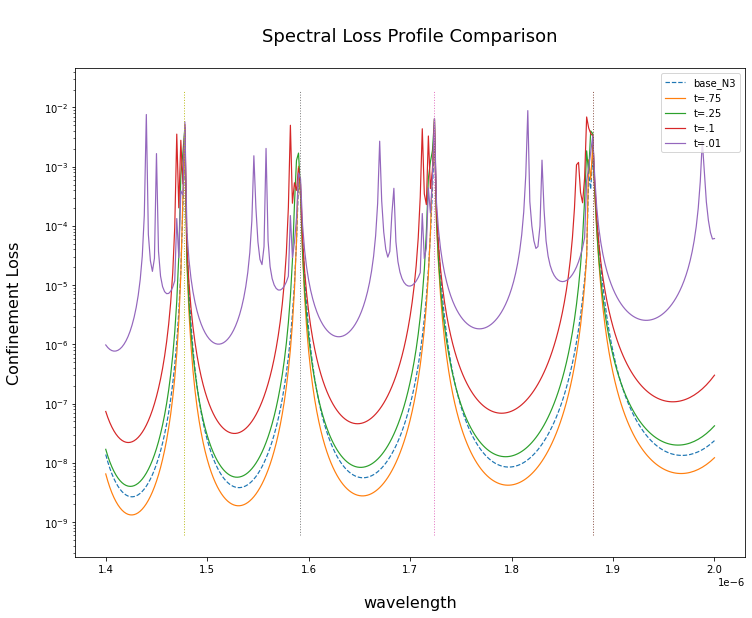

In [28]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N3betas.imag, linewidth=1.2, linestyle='--', label='base_N3')
ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=.25')
ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=.1')
ax.plot(wls, -betas4.imag, linewidth=1.2, label='t=.01')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')



# Even closer

In [33]:
betas5 = np.zeros_like(wls, dtype=complex)

t1 = .001
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas4
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i].real)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas5[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33271031254719-1.9013586604093989e-06j) . Residual of determinant:  9.69721486522965e-11 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23662939592236-1.8468501006779087e-06j) . Residual of determinant:  2.443337543540221e-10 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.14082234421888-1.8549578612975861e-06j) . Residual of determinant:  6.256589234585396e-11 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04528760683115-1.9259937890534364e-06j) . Residual of determinant:  3.6353604168896804e-10 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

scaling guess: 1
Scaled beta:  (66.9500236202496-2.0689712454413624e-06j) . Residual of determinant:  3.0197

scaling guess: 1
scaling guess: 2
Scaled beta:  (63.76672047924179-0.005802573940925877j) . Residual of determinant:  7.897647072443149e-15 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.69309265310383-8.719602945069298e-05j) . Residual of determinant:  1.1756829852783232e-11 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

Scaled beta:  (63.6068427692999-3.060046214883843e-05j) . Residual of determinant:  6.659894867850115e-11 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.52098665116625-1.5676704737377108e-05j) . Residual of determinant:  1.1145489240292116e-10 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

Scaled beta:  (63.43541268788896-9.700797886608014e-06j) . Residual of determinant:  9.865553643495992e-11 


     --------------------  45

scaling guess: 122
scaling guess: 123
scaling guess: 124
scaling guess: 125
scaling guess: 126
scaling guess: 127
scaling guess: 128
scaling guess: 129
scaling guess: 130
scaling guess: 131
scaling guess: 132
scaling guess: 133
scaling guess: 134
scaling guess: 135
scaling guess: 136
scaling guess: 137
scaling guess: 138
scaling guess: 139
scaling guess: 140
scaling guess: 141
scaling guess: 142
scaling guess: 143
scaling guess: 144
scaling guess: 145
scaling guess: 146
scaling guess: 147
scaling guess: 148
scaling guess: 149
scaling guess: 150
scaling guess: 151
scaling guess: 152
scaling guess: 153
scaling guess: 154
scaling guess: 155
scaling guess: 156
scaling guess: 157
scaling guess: 158
scaling guess: 159
scaling guess: 160
scaling guess: 161
scaling guess: 162
scaling guess: 163
scaling guess: 164
scaling guess: 165
scaling guess: 166
scaling guess: 167
scaling guess: 168
scaling guess: 169
scaling guess: 170
scaling guess: 171
scaling guess: 172
scaling guess: 173
scaling gues

scaling guess: 1
scaling guess: 2
Scaled beta:  (58.841180265985635-1.0265864671999468e-05j) . Residual of determinant:  1.246660523894582e-10 


     --------------------  103/301: wavelength: 1.6039999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (58.76775856459841-7.717058856933102e-06j) . Residual of determinant:  2.0117831754233539e-10 


     --------------------  104/301: wavelength: 1.606e-06  --------------------     

Scaled beta:  (58.694528215313845-6.120602005077424e-06j) . Residual of determinant:  2.9231867183089343e-11 


     --------------------  105/301: wavelength: 1.6079999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (58.62148545550501-5.064145150343515e-06j) . Residual of determinant:  1.2380843677309963e-10 


     --------------------  106/301: wavelength: 1.6099999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (58.548627802103084-4.338382231544038e-06j) . Residual of determinant:  

scaling guess: 1
Scaled beta:  (56.108513512650504-4.723427951678487e-06j) . Residual of determinant:  2.4777490954839585e-10 


     --------------------  142/301: wavelength: 1.682e-06  --------------------     

scaling guess: 1
Scaled beta:  (56.041765073423754-4.386479094715548e-06j) . Residual of determinant:  6.649983167668451e-11 


     --------------------  143/301: wavelength: 1.6839999999999999e-06  --------------------     

Scaled beta:  (55.975176178299165-4.157004710675147e-06j) . Residual of determinant:  1.5638714728808863e-10 


     --------------------  144/301: wavelength: 1.6859999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (55.908745911181256-4.01500481082153e-06j) . Residual of determinant:  1.469413484035026e-10 


     --------------------  145/301: wavelength: 1.6879999999999998e-06  --------------------     

Scaled beta:  (55.84247342059621-3.948710773142081e-06j) . Residual of determinant:  4.361854275681015e-10 


     ------

Scaled beta:  (53.618380349017265-3.766868832506576e-06j) . Residual of determinant:  1.9256264045552333e-10 


     --------------------  181/301: wavelength: 1.7599999999999999e-06  --------------------     

Scaled beta:  (53.55742180850047-3.7268210248727417e-06j) . Residual of determinant:  2.585248489417655e-10 


     --------------------  182/301: wavelength: 1.7619999999999998e-06  --------------------     

Scaled beta:  (53.4966016852351-3.7375050673274537e-06j) . Residual of determinant:  3.6986908275712323e-10 


     --------------------  183/301: wavelength: 1.764e-06  --------------------     

Scaled beta:  (53.43591935171496-3.798991517888049e-06j) . Residual of determinant:  8.256439693069195e-11 


     --------------------  184/301: wavelength: 1.766e-06  --------------------     

Scaled beta:  (53.375374180503734-3.9141161297304565e-06j) . Residual of determinant:  8.895917896202213e-11 


     --------------------  185/301: wavelength: 1.7679999999999998e-06  --

Scaled beta:  (51.39586379394655-5.239952189066996e-06j) . Residual of determinant:  2.4936355334150122e-11 


     --------------------  219/301: wavelength: 1.8359999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (51.33984694100547-5.11379455954722e-06j) . Residual of determinant:  1.0880529938787162e-10 


     --------------------  220/301: wavelength: 1.8379999999999998e-06  --------------------     

Scaled beta:  (51.28395224103129-5.054596653466197e-06j) . Residual of determinant:  9.306515075798863e-11 


     --------------------  221/301: wavelength: 1.8399999999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (51.22817912032612-5.058666296172684e-06j) . Residual of determinant:  2.557771921615456e-10 


     --------------------  222/301: wavelength: 1.842e-06  --------------------     

scaling guess: 1
Scaled beta:  (51.17252701520978-5.125559000641519e-06j) . Residual of determinant:  2.583070383955676e-10 


Scaled beta:  (49.14427581153301-5.128639242045905e-06j) . Residual of determinant:  1.0903532743714752e-10 


     --------------------  261/301: wavelength: 1.92e-06  --------------------     

Scaled beta:  (49.09305489004333-5.0015574513901235e-06j) . Residual of determinant:  3.661716990082033e-10 


     --------------------  262/301: wavelength: 1.922e-06  --------------------     

Scaled beta:  (49.041940797661006-4.926025257009451e-06j) . Residual of determinant:  3.4401970585449685e-10 


     --------------------  263/301: wavelength: 1.9239999999999997e-06  --------------------     

Scaled beta:  (48.990933081350995-4.898630087385393e-06j) . Residual of determinant:  1.3345124933367675e-10 


     --------------------  264/301: wavelength: 1.926e-06  --------------------     

Scaled beta:  (48.940031296734276-4.917888153562126e-06j) . Residual of determinant:  1.4912512632463773e-10 


     --------------------  265/301: wavelength: 1.928e-06  --------------------     



scaling guess: 1
Scaled beta:  (47.22331981538337-1.1963598841595216e-05j) . Residual of determinant:  4.2404729710221985e-11 


     --------------------  300/301: wavelength: 1.9979999999999998e-06  --------------------     

Scaled beta:  (47.17600935428164-1.06810783012352e-05j) . Residual of determinant:  1.4253184272686448e-10 


     --------------------  301/301: wavelength: 2e-06  --------------------     

Scaled beta:  (47.128795974362085-9.681177409860644e-06j) . Residual of determinant:  2.1279721302543929e-10 




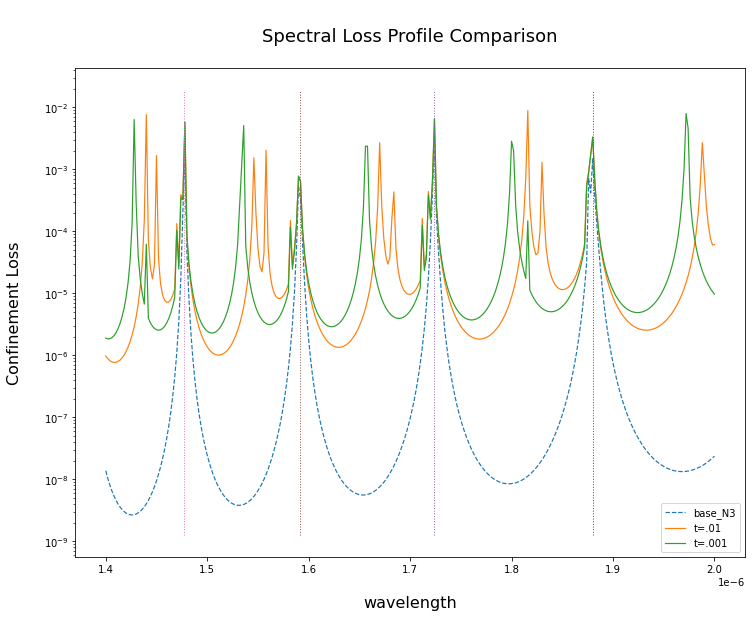

In [34]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N3betas.imag, linewidth=1.2, linestyle='--', label='base_N3')
# ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
# ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=.25')
# ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=.1')
ax.plot(wls, -betas4.imag, linewidth=1.2, label='t=.01')
ax.plot(wls, -betas5.imag, linewidth=1.2, label='t=.001')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Incredibly close

In [35]:
betas6 = np.zeros_like(wls, dtype=complex)

t1 = .0001
d = 4.0775e-05
ts = [d , 1e-5, t1 * d, 1e-5, 2e-5]

centers = betas5
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(centers[i].real)
    imag = 0
    flag = True
    redcuce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas6[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33270610976356-2.0678570381722564e-06j) . Residual of determinant:  3.610455117565173e-10 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23662467642836-2.031435411744318e-06j) . Residual of determinant:  1.5979633973625745e-09 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14081696145267-2.0664571639490765e-06j) . Residual of determinant:  1.7775027244555673e-09 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04528135815565-2.176985007020508e-06j) . Residual of determinant:  6.487483955764596e-10 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95001621668067-2.3785043722165575e-06j) . Residual of determinant:  4.5958790099770686e-10 


     --------

scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
Scaled beta:  (63.76671092283331-0.0058099894176556486j) . Residual of determinant:  4.409610333690531e-15 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.69309017431953-8.786178482304057e-05j) . Residual of determinant:  1.8111424229462194e-11 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

Scaled beta:  (63.606840174390264-3.1010127836772034e-05j) . Residual of determinant:  7.1533076066921114e-12 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.5209839630093-1.5977497931981034e-05j) . Residual of determinant:  2.8929643485533582e-11 


     ---------------

scaling guess: 1
Scaled beta:  (60.658914293122756-3.259131584024601e-06j) . Residual of determinant:  3.786218492856715e-11 


     --------------------  79/301: wavelength: 1.556e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (60.5809160936178-3.0460633643136834e-06j) . Residual of determinant:  7.665290779112044e-10 


     --------------------  80/301: wavelength: 1.558e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.50311887872107-2.9191827828807126e-06j) . Residual of determinant:  3.021118812963638e-10 


     --------------------  81/301: wavelength: 1.5599999999999999e-06  --------------------     

Scaled beta:  (60.425521523208445-2.8648044707682597e-06j) . Residual of determinant:  4.129527899719443e-10 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  --------------------     

Scaled beta:  (60.34812295363199-2.876938703317211e-06j) . Residual of determinant:  2.1

Scaled beta:  (57.759033262076144-4.0838739764949404e-06j) . Residual of determinant:  3.8699457169223986e-10 


     --------------------  118/301: wavelength: 1.634e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.68830336259188-4.593782975016569e-06j) . Residual of determinant:  4.638635938875325e-10 


     --------------------  119/301: wavelength: 1.6359999999999999e-06  --------------------     

Scaled beta:  (57.617744090278656-5.306601729768611e-06j) . Residual of determinant:  6.496416499932863e-12 


     --------------------  120/301: wavelength: 1.6379999999999998e-06  --------------------     

Scaled beta:  (57.54735390743325-6.3194001877074715e-06j) . Residual of determinant:  9.525733504429234e-11 


     --------------------  121/301: wavelength: 1.64e-06  --------------------     

Scaled beta:  (57.47713081953531-7.800608696016993e-06j) . Residual of determinant:  3.031337951720114e-11 


     --------------------  122/301: wavelength: 1.642e-06  

Scaled beta:  (55.31787060369975-6.446993862355704e-06j) . Residual of determinant:  8.295081041573566e-11 


     --------------------  154/301: wavelength: 1.7059999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (55.252979296712134-7.652217242347731e-06j) . Residual of determinant:  2.521747727002938e-11 


     --------------------  155/301: wavelength: 1.708e-06  --------------------     

Scaled beta:  (55.188235188220304-9.38196872158061e-06j) . Residual of determinant:  2.8019296909586343e-11 


     --------------------  156/301: wavelength: 1.71e-06  --------------------     

Scaled beta:  (55.12363561095979-1.1965191842518327e-05j) . Residual of determinant:  1.5761408319000137e-10 


     --------------------  157/301: wavelength: 1.7119999999999999e-06  --------------------     

Scaled beta:  (55.03309349905675-0.0001230182195056702j) . Residual of determinant:  6.520582080087986e-13 


     --------------------  158/301: wavelength: 1.714e-06  -

Scaled beta:  (52.895840235537946-1.085465822580448e-05j) . Residual of determinant:  2.3629776052601904e-10 


     --------------------  193/301: wavelength: 1.7839999999999998e-06  --------------------     

Scaled beta:  (52.836487553522545-1.3624866753457077e-05j) . Residual of determinant:  3.2129601185459986e-11 


     --------------------  194/301: wavelength: 1.786e-06  --------------------     

Scaled beta:  (52.777258100694006-1.7841399890994986e-05j) . Residual of determinant:  8.524370421647467e-11 


     --------------------  195/301: wavelength: 1.7879999999999999e-06  --------------------     

Scaled beta:  (52.718146122546734-2.4681605278032586e-05j) . Residual of determinant:  7.291645865893528e-11 


     --------------------  196/301: wavelength: 1.7899999999999998e-06  --------------------     

Scaled beta:  (52.65914120764212-3.680967186215598e-05j) . Residual of determinant:  2.834964693674613e-11 


     --------------------  197/301: wavelength: 1.792e-06 

scaling guess: 1
Scaled beta:  (50.84111837347216-6.99823708092372e-06j) . Residual of determinant:  2.9675235300317095e-11 


     --------------------  229/301: wavelength: 1.8559999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (50.78629657186579-7.84807947769837e-06j) . Residual of determinant:  9.564789038796881e-11 


     --------------------  230/301: wavelength: 1.8579999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (50.73159027763205-8.964422808628221e-06j) . Residual of determinant:  1.682377500107387e-11 


     --------------------  231/301: wavelength: 1.86e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (50.67699832786739-1.0455030517937047e-05j) . Residual of determinant:  5.109913916316848e-12 


     --------------------  232/301: wavelength: 1.862e-06  --------------------     

Scaled beta:  (50.62251923231384-1.2490778302785802e-05j) . Residual of determinant:  2.0927698317590802e-

scaling guess: 1
Scaled beta:  (48.83853536339765-5.565686188057882e-06j) . Residual of determinant:  1.1007441699674349e-10 


     --------------------  267/301: wavelength: 1.932e-06  --------------------     

Scaled beta:  (48.7879479720006-5.7849492864112e-06j) . Residual of determinant:  8.153404454286823e-11 


     --------------------  268/301: wavelength: 1.9339999999999996e-06  --------------------     

Scaled beta:  (48.737464606161666-6.075598789465736e-06j) . Residual of determinant:  2.908595976429991e-10 


     --------------------  269/301: wavelength: 1.9359999999999998e-06  --------------------     

Scaled beta:  (48.68708476875749-6.450160036189506e-06j) . Residual of determinant:  2.8480667805425625e-10 


     --------------------  270/301: wavelength: 1.938e-06  --------------------     

Scaled beta:  (48.636807932459455-6.926088320813776e-06j) . Residual of determinant:  1.8211029839336652e-10 


     --------------------  271/301: wavelength: 1.94e-06  ---

scaling guess: 1
Scaled beta:  (47.27070018688866-1.1407410982945653e-05j) . Residual of determinant:  1.4692943533904646e-10 


     --------------------  299/301: wavelength: 1.996e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (47.223295723157-1.0176026733225394e-05j) . Residual of determinant:  9.721991504667757e-11 


     --------------------  300/301: wavelength: 1.9979999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (47.17598848690426-9.212450439193256e-06j) . Residual of determinant:  3.152418860697505e-11 


     --------------------  301/301: wavelength: 2e-06  --------------------     

scaling guess: 1
Scaled beta:  (47.12877767913105-8.451424310049818e-06j) . Residual of determinant:  9.665925580910745e-11 




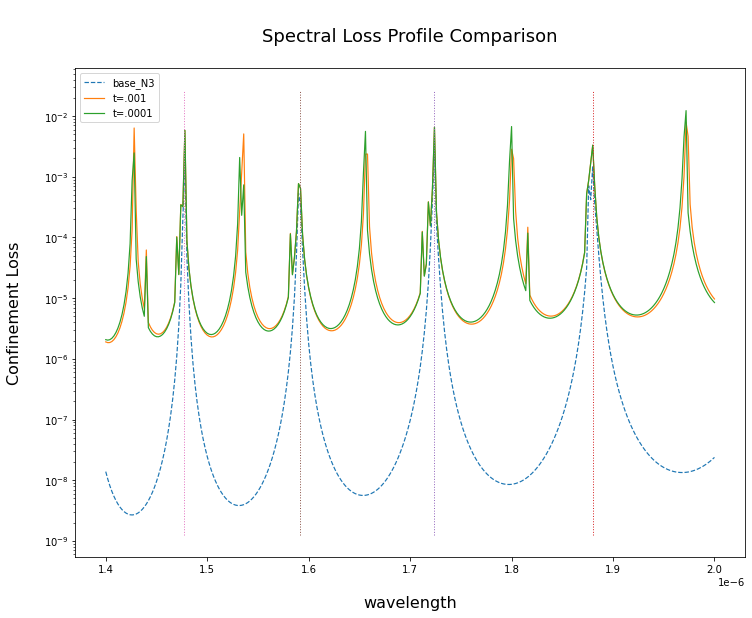

In [45]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

ax.plot(wls, -N3betas.imag, linewidth=1.2, linestyle='--', label='base_N3')
# ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
# ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=.25')
# ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=.1')
# ax.plot(wls, -betas4.imag, linewidth=1.2, label='t=.01')
ax.plot(wls, -betas5.imag, linewidth=1.2, label='t=.001')
ax.plot(wls, -betas6.imag, linewidth=1.2, label='t=.0001')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Check if this is same ultimate profile as a 2x thick N1

In [40]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]
mats = ['air', 'glass','air']
maxhs = [100 for r in mats]

d = 4.0775e-05
ts = [d , 2e-5, d]
A = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=maxhs)

In [41]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

In [42]:
betas7 = np.zeros_like(wls, dtype=complex)

d = 4.0775e-05
ts = [d , 2e-5, d]

centers = betas5
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99999*k_low)
    imag = 0
    flag = True
    redcuce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas7[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.31207570668339-2.021536956068475e-05j) . Residual of determinant:  3.210718109510831e-12 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.21591963074188-1.9641724999528342e-05j) . Residual of determinant:  8.006401649911782e-14 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.12003786889855-1.9762499625076298e-05j) . Residual of determinant:  3.075259875008022e-12 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.02442725943314-2.0585717555980746e-05j) . Residual of determinant:  3.396289302879378e-12 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.9290844886114-2.2221619441161206e-05j) . Residual of determinant:  3.385997650492222e-13 


     -----------

scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
scaling guess: 37
scaling guess: 38
scaling guess: 39
scaling guess: 40
scaling guess: 41
scaling guess: 42
scaling guess: 43
scaling guess: 44
scaling guess: 45
scaling guess: 46
scaling guess: 47
scaling guess: 48
scaling guess: 49
scaling guess: 50
scaling guess: 51
scaling guess: 52
scaling guess: 53
scaling guess: 54
scaling guess: 55
scaling guess: 56
scaling guess: 57
scaling guess: 58
scaling guess: 59
Scaled beta:  (63.7808820931631-0.000809847444309071j) . Residual of determinant:  4.77561775883575e-13 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

scaling guess: 60
scaling guess: 61
scaling guess: 62
scaling guess: 63
Scaled beta:  (63.67380315522463-0.001131172622319554j) . Residual of determinant:  3.675772619301067e-15 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

scaling guess: 64
scaling guess: 65
Sca

scaling guess: 134
Scaled beta:  (61.10914773528735-0.00010964462227453944j) . Residual of determinant:  3.6323570935829945e-13 


     --------------------  73/301: wavelength: 1.544e-06  --------------------     

Scaled beta:  (61.029723227132855-7.825814549875617e-05j) . Residual of determinant:  5.992151778909357e-13 


     --------------------  74/301: wavelength: 1.5459999999999999e-06  --------------------     

scaling guess: 135
Scaled beta:  (60.95055359712943-5.9860220055155256e-05j) . Residual of determinant:  5.172688645954704e-14 


     --------------------  75/301: wavelength: 1.5479999999999998e-06  --------------------     

Scaled beta:  (60.87161863479287-4.828351759827814e-05j) . Residual of determinant:  1.9471670859484507e-12 


     --------------------  76/301: wavelength: 1.55e-06  --------------------     

scaling guess: 136
Scaled beta:  (60.792906758570695-4.064531300475702e-05j) . Residual of determinant:  3.9248301638665566e-13 


     ----------------

Scaled beta:  (58.30742040097989-3.40320553356962e-05j) . Residual of determinant:  1.2056532161790425e-12 


     --------------------  110/301: wavelength: 1.618e-06  --------------------     

Scaled beta:  (58.23520982968502-3.2108141068880195e-05j) . Residual of determinant:  7.71990698358817e-13 


     --------------------  111/301: wavelength: 1.62e-06  --------------------     

scaling guess: 193
Scaled beta:  (58.16318017634661-3.093359813821846e-05j) . Residual of determinant:  5.011288208881924e-13 


     --------------------  112/301: wavelength: 1.6219999999999999e-06  --------------------     

Scaled beta:  (58.09132948894921-3.040273166019333e-05j) . Residual of determinant:  2.097692186563063e-12 


     --------------------  113/301: wavelength: 1.6239999999999998e-06  --------------------     

Scaled beta:  (58.0196559637029-3.0466468477429785e-05j) . Residual of determinant:  3.999115905735585e-12 


     --------------------  114/301: wavelength: 1.626e-06  ---

Scaled beta:  (55.55371885580794-3.7799572816522603e-05j) . Residual of determinant:  1.5222047923079292e-12 


     --------------------  150/301: wavelength: 1.6979999999999999e-06  --------------------     

scaling guess: 216
Scaled beta:  (55.4881439638774-4.0402369907249414e-05j) . Residual of determinant:  8.160820974804456e-13 


     --------------------  151/301: wavelength: 1.6999999999999998e-06  --------------------     

Scaled beta:  (55.42271808015145-4.3987934635150074e-05j) . Residual of determinant:  5.457912793744251e-13 


     --------------------  152/301: wavelength: 1.702e-06  --------------------     

Scaled beta:  (55.35743883970244-4.885130411680454e-05j) . Residual of determinant:  1.0505472772565706e-13 


     --------------------  153/301: wavelength: 1.704e-06  --------------------     

scaling guess: 217
Scaled beta:  (55.29230328619434-5.544635652833253e-05j) . Residual of determinant:  1.0872391393977781e-12 


     --------------------  154/301: w

Scaled beta:  (53.28867035767478-4.225748101908671e-05j) . Residual of determinant:  2.424801624527858e-13 


     --------------------  186/301: wavelength: 1.77e-06  --------------------     

Scaled beta:  (53.22831777612378-4.471597694887838e-05j) . Residual of determinant:  1.087704896579816e-12 


     --------------------  187/301: wavelength: 1.772e-06  --------------------     

Scaled beta:  (53.168097035142395-4.804433680269612e-05j) . Residual of determinant:  1.2343461492108663e-12 


     --------------------  188/301: wavelength: 1.7739999999999999e-06  --------------------     

Scaled beta:  (53.10800627856633-5.246323273295087e-05j) . Residual of determinant:  5.947815332539955e-13 


     --------------------  189/301: wavelength: 1.7759999999999998e-06  --------------------     

Scaled beta:  (53.048043269083855-5.8298858905197944e-05j) . Residual of determinant:  1.1405531012502265e-12 


     --------------------  190/301: wavelength: 1.778e-06  -----------------

Scaled beta:  (51.14524076009603-4.466647129825325e-05j) . Residual of determinant:  5.681762587438585e-13 


     --------------------  223/301: wavelength: 1.8439999999999998e-06  --------------------     

Scaled beta:  (51.08963504370591-4.563675951516326e-05j) . Residual of determinant:  1.2509179647871826e-12 


     --------------------  224/301: wavelength: 1.8459999999999998e-06  --------------------     

Scaled beta:  (51.03414800968595-4.7178970736807894e-05j) . Residual of determinant:  7.020216840967096e-13 


     --------------------  225/301: wavelength: 1.848e-06  --------------------     

Scaled beta:  (50.97877850263247-4.9362873225015584e-05j) . Residual of determinant:  8.09609215283515e-13 


     --------------------  226/301: wavelength: 1.8499999999999999e-06  --------------------     

scaling guess: 300
scaling guess: 301
scaling guess: 302
scaling guess: 303
scaling guess: 304
Scaled beta:  (50.92352526106906-5.22943478157884e-05j) . Residual of determinan

Scaled beta:  (49.846869082569945-0.0004712110848383103j) . Residual of determinant:  1.7512207614459295e-13 


     --------------------  247/301: wavelength: 1.8919999999999998e-06  --------------------     

scaling guess: 458
Scaled beta:  (49.793680640538796-0.0003276736185064073j) . Residual of determinant:  2.8693023229800255e-13 


     --------------------  248/301: wavelength: 1.894e-06  --------------------     

Scaled beta:  (49.740718606946615-0.0002422353366581687j) . Residual of determinant:  1.883104765882486e-13 


     --------------------  249/301: wavelength: 1.8959999999999997e-06  --------------------     

scaling guess: 459
Scaled beta:  (49.68794030978773-0.00018770431495159818j) . Residual of determinant:  3.1103317896732695e-13 


     --------------------  250/301: wavelength: 1.8979999999999999e-06  --------------------     

Scaled beta:  (49.63532114550828-0.00015098556062169186j) . Residual of determinant:  5.901135653282415e-13 


     ----------------

scaling guess: 482
scaling guess: 483
scaling guess: 484
scaling guess: 485
scaling guess: 486
scaling guess: 487
scaling guess: 488
scaling guess: 489
scaling guess: 490
scaling guess: 491
scaling guess: 492
scaling guess: 493
scaling guess: 494
scaling guess: 495
scaling guess: 496
scaling guess: 497
scaling guess: 498
scaling guess: 499
scaling guess: 500
Scaled beta:  (47.89299542210876-0.001072501476576598j) . Residual of determinant:  1.4946297160606606e-12 


     --------------------  286/301: wavelength: 1.9699999999999998e-06  --------------------     

Scaled beta:  (47.84187069580264-0.005649484907399819j) . Residual of determinant:  5.194188002137142e-15 


     --------------------  287/301: wavelength: 1.972e-06  --------------------     

scaling guess: 501
scaling guess: 502
scaling guess: 503
scaling guess: 504
scaling guess: 505
scaling guess: 506
scaling guess: 507
scaling guess: 508
scaling guess: 509
scaling guess: 510
scaling guess: 511
scaling guess: 512
scaling

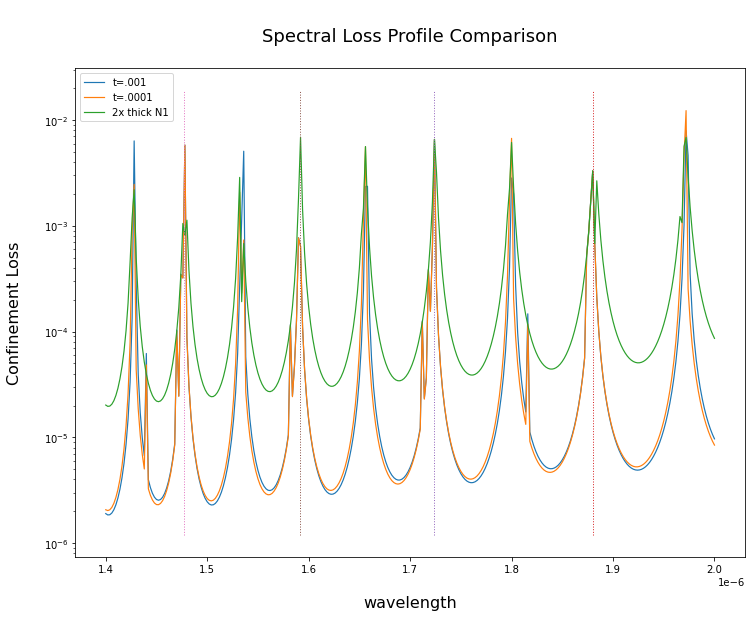

In [46]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

# ax.plot(wls, -N3betas.imag, linewidth=1.2, linestyle='--', label='base_N3')
# ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
# ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=.25')
# ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=.1')
# ax.plot(wls, -betas4.imag, linewidth=1.2, label='t=.01')
ax.plot(wls, -betas5.imag, linewidth=1.2, label='t=.001')
ax.plot(wls, -betas6.imag, linewidth=1.2, label='t=.0001')
ax.plot(wls, -betas7.imag, linewidth=1.2, label='2x thick N1')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# That's pretty convincing

But the distance is still having an effect, the loss is lower, let's get even closer

In [48]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass, lambda x: n_air]
mats = ['air', 'glass','air', 'glass', 'air']
maxhs = [100 for r in mats]

d = 4.0775e-05
ts = [d , 1e-5, d, 1e-5, 2e-5]
A = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=maxhs)

In [59]:
betas8 = np.zeros_like(wls, dtype=complex)

t1 = .000001
d = 4.0775e-05
ts = [d , 1e-5,0, 1e-5, 2e-5]

centers = betas6
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, wl=wl, ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.999999*k_low)
    imag = 0
    flag = True
    redcuce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.", beta.imag)
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas8[i] = beta

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33270561492323-2.0878505501271214e-06j) . Residual of determinant:  2.798288760283221e-10 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

scaling guess: 1685
Scaled beta:  (67.23662411639822-2.05383240540138e-06j) . Residual of determinant:  1.346318538982437e-09 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

scaling guess: 1686
Scaled beta:  (67.14081631710543-2.0924206304108603e-06j) . Residual of determinant:  3.1564108557992576e-10 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04528060265805-2.2082086238136437e-06j) . Residual of determinant:  5.8191437253311355e-11 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95001531111765-2.4176099515847582e-06j) . Residual of determinant: 

scaling guess: 1730
Scaled beta:  (63.95125358507755-6.05999561351533e-05j) . Residual of determinant:  2.6761704538790455e-12 


     --------------------  39/301: wavelength: 1.476e-06  --------------------     

scaling guess: 1731
scaling guess: 1732
scaling guess: 1733
scaling guess: 1734
scaling guess: 1735
scaling guess: 1736
scaling guess: 1737
scaling guess: 1738
scaling guess: 1739
Scaled beta:  (63.83987879292525-0.001053598970754914j) . Residual of determinant:  2.198522399034352e-14 


     --------------------  40/301: wavelength: 1.4779999999999999e-06  --------------------     

Scaled beta:  (63.766709861995956-0.005810815402816271j) . Residual of determinant:  3.692512432038892e-15 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.69308989757572-8.793631028535197e-05j) . Residual of determinant:  3.079920260753177e-12 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

scaling g

scaling guess: 1837
scaling guess: 1838
scaling guess: 1839
scaling guess: 1840
scaling guess: 1841
scaling guess: 1842
Captured wrong mode, retrying.
scaling guess: 1843
scaling guess: 1844
scaling guess: 1845
scaling guess: 1846
scaling guess: 1847
scaling guess: 1848
scaling guess: 1849
scaling guess: 1850
Captured wrong mode, retrying.
scaling guess: 1851
scaling guess: 1852
scaling guess: 1853
scaling guess: 1854
scaling guess: 1855
scaling guess: 1856
scaling guess: 1857
scaling guess: 1858
scaling guess: 1859
scaling guess: 1860
scaling guess: 1861
scaling guess: 1862
scaling guess: 1863
scaling guess: 1864
scaling guess: 1865
scaling guess: 1866
scaling guess: 1867
scaling guess: 1868
scaling guess: 1869
scaling guess: 1870
scaling guess: 1871
scaling guess: 1872
scaling guess: 1873
scaling guess: 1874
scaling guess: 1875
scaling guess: 1876
scaling guess: 1877
scaling guess: 1878
Scaled beta:  (61.45089450368325-0.0001919653223511338j) . Residual of determinant:  6.44243099614

Scaled beta:  (58.96630220362655-0.0002814985839157563j) . Residual of determinant:  4.4798059380523744e-13 


     --------------------  101/301: wavelength: 1.6e-06  --------------------     

Scaled beta:  (58.89212036729903-0.00017165093549971236j) . Residual of determinant:  4.386628497675408e-13 


     --------------------  102/301: wavelength: 1.6019999999999999e-06  --------------------     

Scaled beta:  (58.818261397427335-0.00011702568881146868j) . Residual of determinant:  1.283585432931123e-13 


     --------------------  103/301: wavelength: 1.6039999999999998e-06  --------------------     

scaling guess: 1922
scaling guess: 1923
scaling guess: 1924
Scaled beta:  (58.74466084268087-8.626307171276112e-05j) . Residual of determinant:  5.18500408240076e-13 


     --------------------  104/301: wavelength: 1.606e-06  --------------------     

Scaled beta:  (58.67128761842755-6.739665821606237e-05j) . Residual of determinant:  5.337842550153454e-13 


     --------------

scaling guess: 1988
scaling guess: 1989
Scaled beta:  (56.556537469720766-0.00014405293752209323j) . Residual of determinant:  5.972282559946812e-13 


     --------------------  135/301: wavelength: 1.668e-06  --------------------     

scaling guess: 1990
Scaled beta:  (56.488445725639124-0.00010672337234231078j) . Residual of determinant:  1.7522510852125947e-13 


     --------------------  136/301: wavelength: 1.6699999999999999e-06  --------------------     

Scaled beta:  (56.42056458334826-8.34640886636648e-05j) . Residual of determinant:  1.2415233882586059e-12 


     --------------------  137/301: wavelength: 1.6719999999999998e-06  --------------------     

Scaled beta:  (56.352876459530606-6.811434237479092e-05j) . Residual of determinant:  3.913055402259647e-13 


     --------------------  138/301: wavelength: 1.674e-06  --------------------     

scaling guess: 1991
Scaled beta:  (56.28537073644352-5.7556181651482704e-05j) . Residual of determinant:  1.0195795270467053

scaling guess: 2042
scaling guess: 2043
Scaled beta:  (54.273564335768555-0.00016114887493545843j) . Residual of determinant:  5.070447384918142e-13 


     --------------------  170/301: wavelength: 1.738e-06  --------------------     

Scaled beta:  (54.21083140039394-0.00012229845089932904j) . Residual of determinant:  5.585395252044086e-13 


     --------------------  171/301: wavelength: 1.7399999999999999e-06  --------------------     

scaling guess: 2044
scaling guess: 2045
Scaled beta:  (54.14828695480411-9.719982414449176e-05j) . Residual of determinant:  8.632317192958113e-13 


     --------------------  172/301: wavelength: 1.742e-06  --------------------     

scaling guess: 2046
Scaled beta:  (54.08591561078963-8.016221256275503e-05j) . Residual of determinant:  2.8286633718932425e-13 


     --------------------  173/301: wavelength: 1.744e-06  --------------------     

Scaled beta:  (54.02370774844215-6.816356739859652e-05j) . Residual of determinant:  3.852748954282

Scaled beta:  (52.168704373162875-0.0005790057496884096j) . Residual of determinant:  6.147869369983598e-14 


     --------------------  205/301: wavelength: 1.8079999999999999e-06  --------------------     

scaling guess: 2086
Scaled beta:  (52.110363663565685-0.00036429575355303203j) . Residual of determinant:  2.889950089755306e-13 


     --------------------  206/301: wavelength: 1.8099999999999998e-06  --------------------     

Scaled beta:  (52.0523330886063-0.00025103104590657924j) . Residual of determinant:  3.1848474533295493e-13 


     --------------------  207/301: wavelength: 1.8119999999999998e-06  --------------------     

scaling guess: 2087
Scaled beta:  (51.9945346394327-0.00018483243488058758j) . Residual of determinant:  2.2521161487858022e-13 


     --------------------  208/301: wavelength: 1.814e-06  --------------------     

scaling guess: 2088
Scaled beta:  (51.93692801427846-0.0001431169900199426j) . Residual of determinant:  1.138134894439508e-13 


  

scaling guess: 2117
scaling guess: 2118
scaling guess: 2119
scaling guess: 2120
scaling guess: 2121
scaling guess: 2122
scaling guess: 2123
scaling guess: 2124
scaling guess: 2125
scaling guess: 2126
scaling guess: 2127
scaling guess: 2128
scaling guess: 2129
scaling guess: 2130
scaling guess: 2131
scaling guess: 2132
scaling guess: 2133
scaling guess: 2134
scaling guess: 2135
scaling guess: 2136
scaling guess: 2137
scaling guess: 2138
scaling guess: 2139
scaling guess: 2140
scaling guess: 2141
scaling guess: 2142
scaling guess: 2143
scaling guess: 2144
scaling guess: 2145
scaling guess: 2146
scaling guess: 2147
scaling guess: 2148
scaling guess: 2149
scaling guess: 2150
scaling guess: 2151
scaling guess: 2152
scaling guess: 2153
scaling guess: 2154
scaling guess: 2155
scaling guess: 2156
scaling guess: 2157
scaling guess: 2158
scaling guess: 2159
scaling guess: 2160
scaling guess: 2161
scaling guess: 2162
scaling guess: 2163
scaling guess: 2164
scaling guess: 2165
scaling guess: 2166


Scaled beta:  (48.65248023533106-7.78694489020665e-05j) . Residual of determinant:  7.313618980892687e-13 


     --------------------  270/301: wavelength: 1.938e-06  --------------------     

Scaled beta:  (48.60210406428349-8.338547117952205e-05j) . Residual of determinant:  1.1819003939259181e-12 


     --------------------  271/301: wavelength: 1.94e-06  --------------------     

scaling guess: 2252
scaling guess: 2253
Scaled beta:  (48.55182590774583-9.03415556114613e-05j) . Residual of determinant:  3.6647255967175853e-13 


     --------------------  272/301: wavelength: 1.9419999999999998e-06  --------------------     

Scaled beta:  (48.50164400787683-9.910943504521763e-05j) . Residual of determinant:  3.201360433543396e-13 


     --------------------  273/301: wavelength: 1.944e-06  --------------------     

Scaled beta:  (48.45155624241707-0.0001102104265488793j) . Residual of determinant:  4.370759068829774e-13 


     --------------------  274/301: wavelength: 1.9459

Scaled beta:  (47.093912370515774-0.00010217508314722804j) . Residual of determinant:  7.159680792780569e-13 




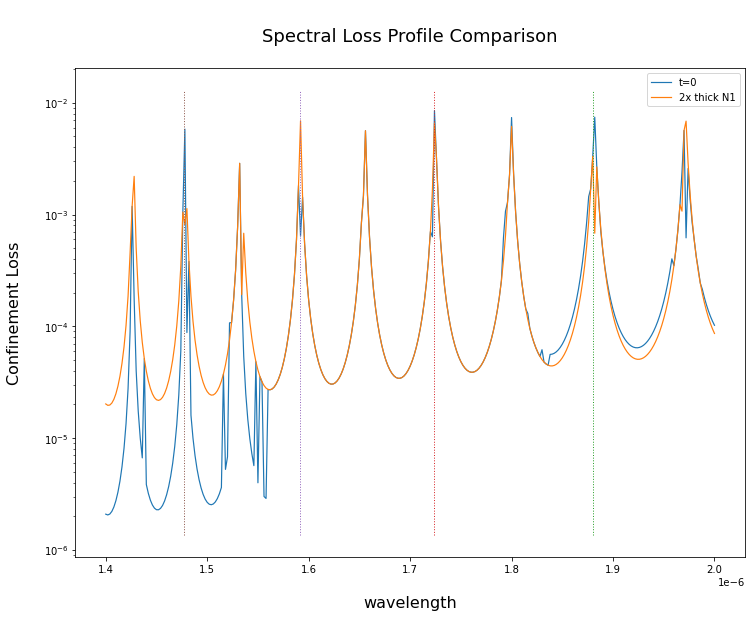

In [61]:
%matplotlib inline

fig = plt.figure(figsize=(12,9))

ax = plt.gca()
ax.set_title('\nSpectral Loss Profile Comparison\n', fontsize=18)
ax.set_xlabel('\nwavelength', fontsize=16)
ax.set_ylabel('Confinement Loss\n', fontsize=16)

# ax.plot(wls, -N3betas.imag, linewidth=1.2, linestyle='--', label='base_N3')
# ax.plot(wls, -betas1.imag, linewidth=1.2, label='t=.75')
# ax.plot(wls, -betas2.imag, linewidth=1.2, label='t=.25')
# ax.plot(wls, -betas3.imag, linewidth=1.2, label='t=.1')
# ax.plot(wls, -betas4.imag, linewidth=1.2, label='t=.01')
# ax.plot(wls, -betas5.imag, linewidth=1.2, label='t=.001')
# ax.plot(wls, -betas6.imag, linewidth=1.2, label='t=.0001')
ax.plot(wls, -betas8.imag, linewidth=1.2, label='t=0')
ax.plot(wls, -betas7.imag, linewidth=1.2, label='2x thick N1')
ax.legend()

ax.set_yscale('log')
m, M = ax.get_ylim()

for l in ls:
    ax.plot([l,l], [m, M],  linewidth=1, linestyle=':')


# Nope

No matter what it seems, the loss is lower with arbitrarily close layers (that are nonetheless separated).

# In fact, that looked like a bug

I checked it though and it wasn't.  It looks like I'm getting off track at some point with my thickness and catching higher order modes.